## Libraries

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Data Reading

In [420]:
# Read CSV File
path =  "smmh.csv" 
df = pd.read_csv(path, index_col=0)

In [421]:
df.head()

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
Timestamp,,,,,,,,,,,,,,,,,,,,
4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


## Rename Data Column Names

In [422]:
df.columns = ['Age', 'Gender', 'Relationship_Status', 'Occupation_Status', 'Affiliated_Organizations', 
              'Use_Social_Media', 'Social_Media_Platforms', 'Average_Daily_Social_Media_Time', 
              'Use_Social_Media_Without_Purpose', 'Distracted_By_Social_Media', 'Restless_Without_Social_Media', 
              'Easily_Distracted_Scale', 'Bothered_By_Worries_Scale', 'Difficult_To_Concentrate', 
              'Compare_To_Successful_People_Often', 'Feelings_About_Comparisons', 'Seek_Validation', 
              'Feel_Depressed_Or_Down_Often', 'Interest_Fluctuation_Scale', 'Sleep_Issues_Frequency']
df.head()

,Age,Gender,Relationship_Status,Occupation_Status,Affiliated_Organizations,Use_Social_Media,Social_Media_Platforms,Average_Daily_Social_Media_Time,Use_Social_Media_Without_Purpose,Distracted_By_Social_Media,Restless_Without_Social_Media,Easily_Distracted_Scale,Bothered_By_Worries_Scale,Difficult_To_Concentrate,Compare_To_Successful_People_Often,Feelings_About_Comparisons,Seek_Validation,Feel_Depressed_Or_Down_Often,Interest_Fluctuation_Scale,Sleep_Issues_Frequency
Timestamp,,,,,,,,,,,,,,,,,,,,
4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


## Data Visualization and EDA

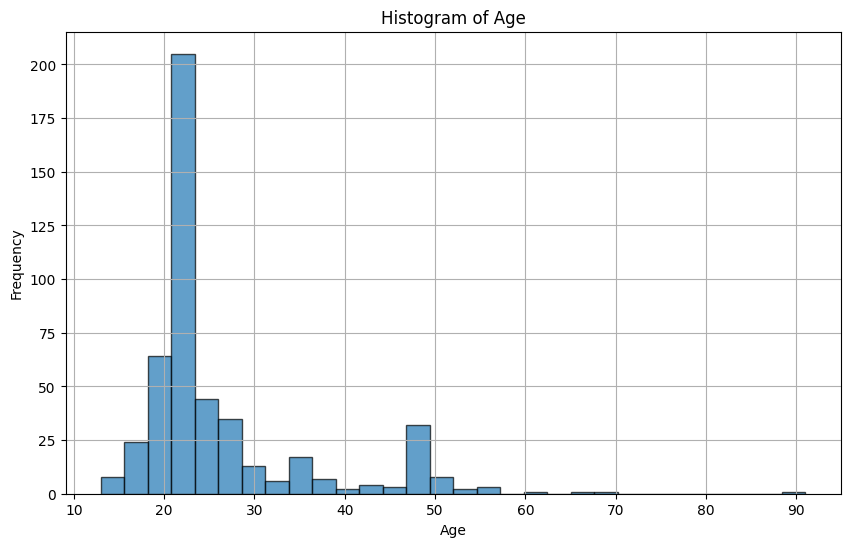

In [423]:
# Create a new figure with a specified size (width: 10 inches, height: 6 inches)
plt.figure(figsize=(10, 6))

# Create a histogram of the 'Age' column from the DataFrame 'df'
# with 30 bins, black edges, and a slight transparency (alpha=0.7)
plt.hist(df['Age'], bins=30, edgecolor='black', alpha=0.7)

# Set the label for the x-axis
plt.xlabel('Age')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title for the histogram
plt.title('Histogram of Age')

# Add grid lines to the plot
plt.grid(True)

# Display the histogram plot
plt.show()

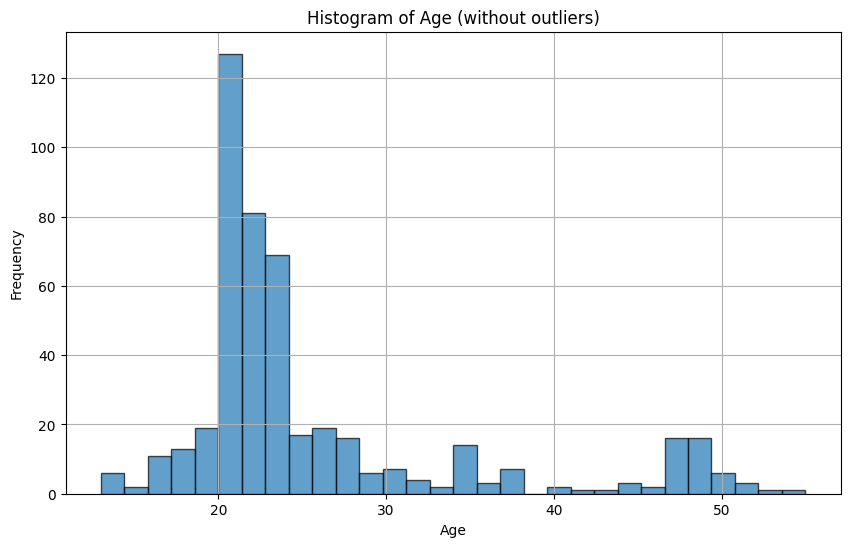

In [424]:
# Calculate the z-scores for the 'Age' column in the DataFrame 'df'
# Z-score measures how many standard deviations a data point is away from the mean
z_scores = (df['Age'] - df['Age'].mean()) / df['Age'].std()

# Filter the DataFrame to keep only the rows where the absolute z-score is less than 3
df = df.loc[abs(z_scores) < 3]

# Create a new figure with a specified size (width: 10 inches, height: 6 inches)
plt.figure(figsize=(10, 6))

# Create a histogram of the 'Age' column from the filtered DataFrame 'df'
# with 30 bins, black edges, and a slight transparency (alpha=0.7)
plt.hist(df['Age'], bins=30, edgecolor='black', alpha=0.7)

# Set the label for the x-axis
plt.xlabel('Age')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title for the histogram, indicating that outliers have been removed
plt.title('Histogram of Age (without outliers)')

# Add grid lines to the plot
plt.grid(True)

# Display the histogram plot
plt.show()

As we see in the histogram, most of the participants are in age between 20 and 30 

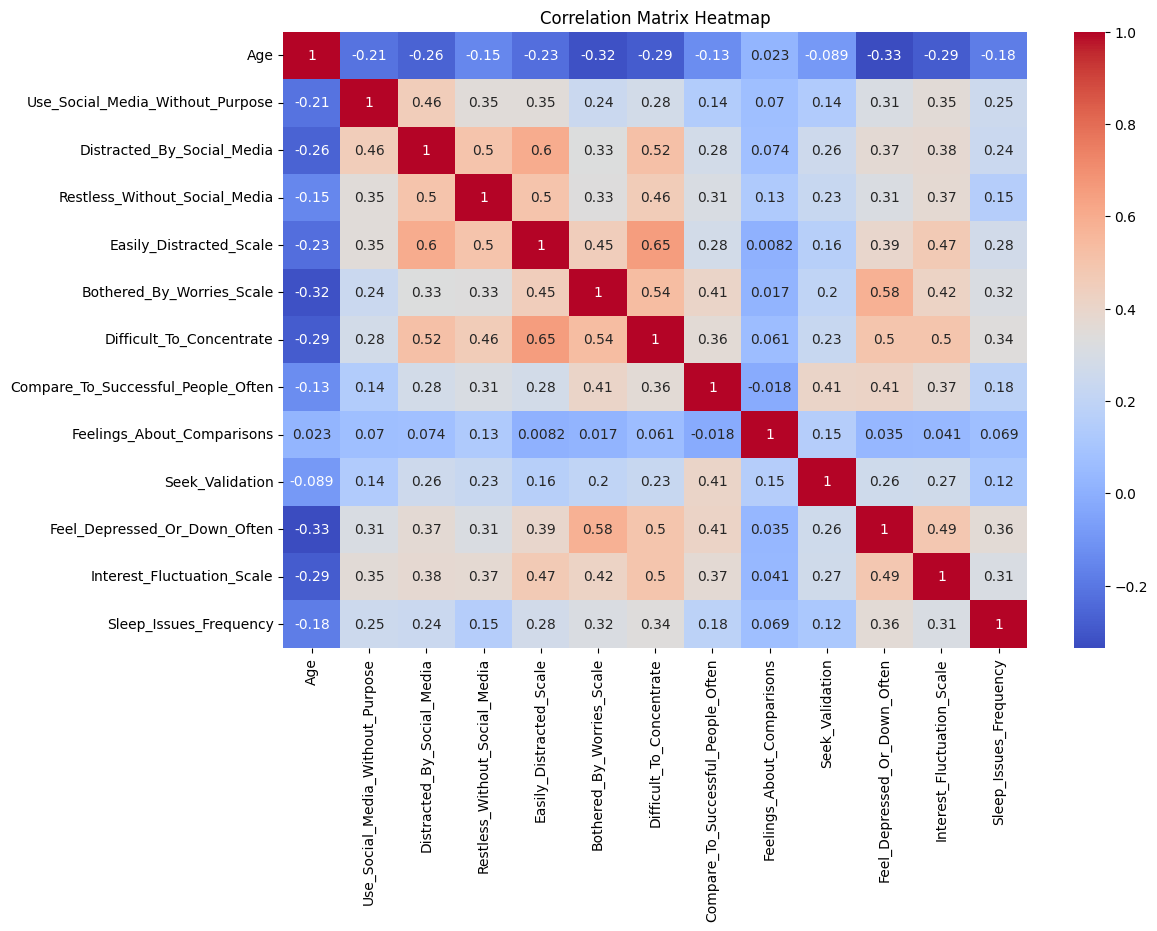

In [425]:
# Select columns with numeric data types from the DataFrame 'df'
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Create a new figure with a specified size (width: 12 inches, height: 8 inches)
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix,
# with annotations displaying the correlation values and using the 'coolwarm' color map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title for the heatmap
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

By examining the correlation matrix, we can detect highly correlated features. For example difficult to concentrate and easily distracted features are highly positive correlated(0.65)

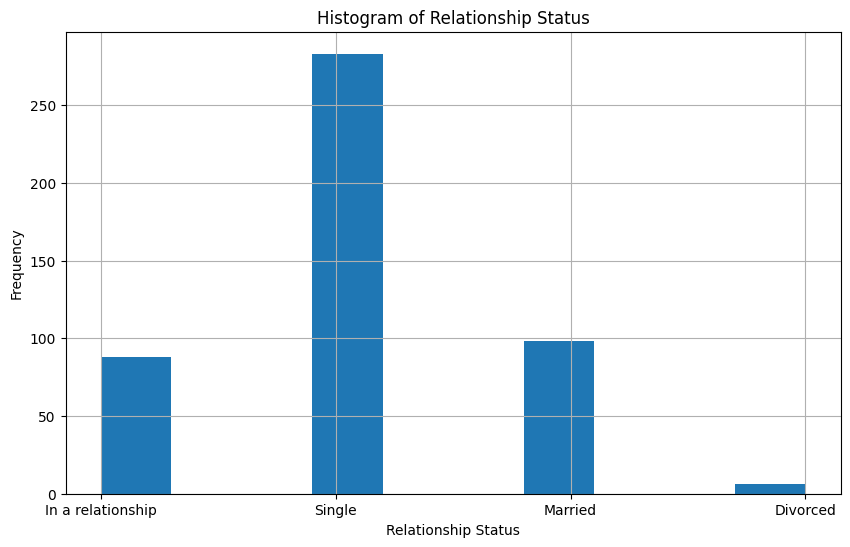

Single               283
Married               98
In a relationship     88
Divorced               6
Name: Relationship_Status, dtype: int64


In [426]:
# Create a new figure with a specified size (width: 10 inches, height: 6 inches)
plt.figure(figsize=(10, 6))

# Create a histogram of the 'Relationship_Status' column from the DataFrame 'df'
df['Relationship_Status'].hist()

# Set the label for the x-axis
plt.xlabel('Relationship Status')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title for the histogram
plt.title('Histogram of Relationship Status')

# Display the histogram plot
plt.show()

# Calculate and print the counts of each unique value in the 'Relationship_Status' column
relationship_count = df['Relationship_Status'].value_counts()
print(relationship_count)

Most of the participants are single as seen in the histogram.

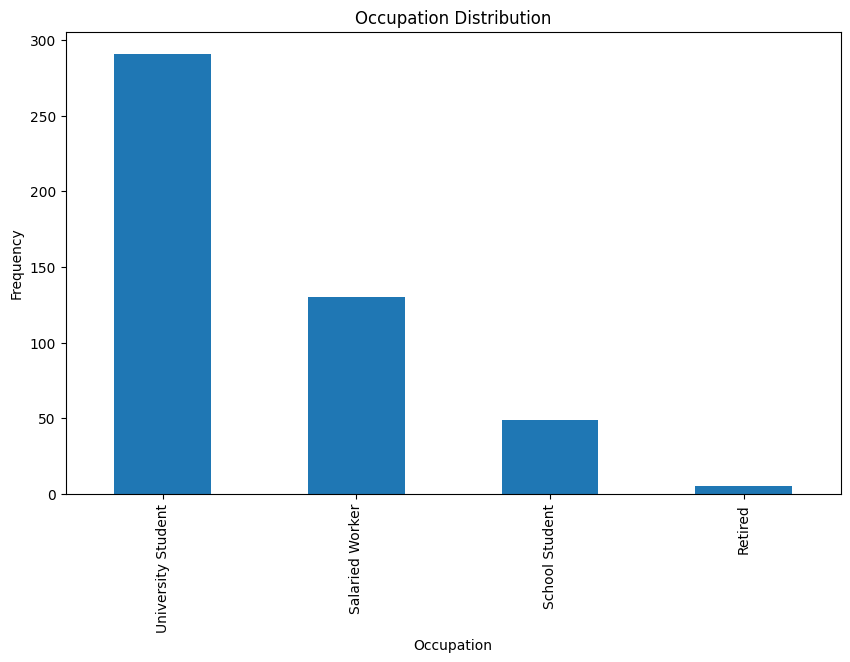

University Student    291
Salaried Worker       130
School Student         49
Retired                 5
Name: Occupation_Status, dtype: int64


In [427]:
# Create a new figure with a specified size (width: 10 inches, height: 6 inches)
plt.figure(figsize=(10, 6))

# Calculate the counts of each unique value in the 'Occupation_Status' column
occupation_count = df['Occupation_Status'].value_counts()

# Create a bar plot to visualize the distribution of 'Occupation_Status'
occupation_count.plot(kind='bar')

# Set the label for the x-axis
plt.xlabel('Occupation')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title for the bar plot
plt.title('Occupation Distribution')

# Display the bar plot
plt.show()

# Print the counts of each unique value in the 'Occupation_Status' column
print(occupation_count)

Big majority of the participants are university students.

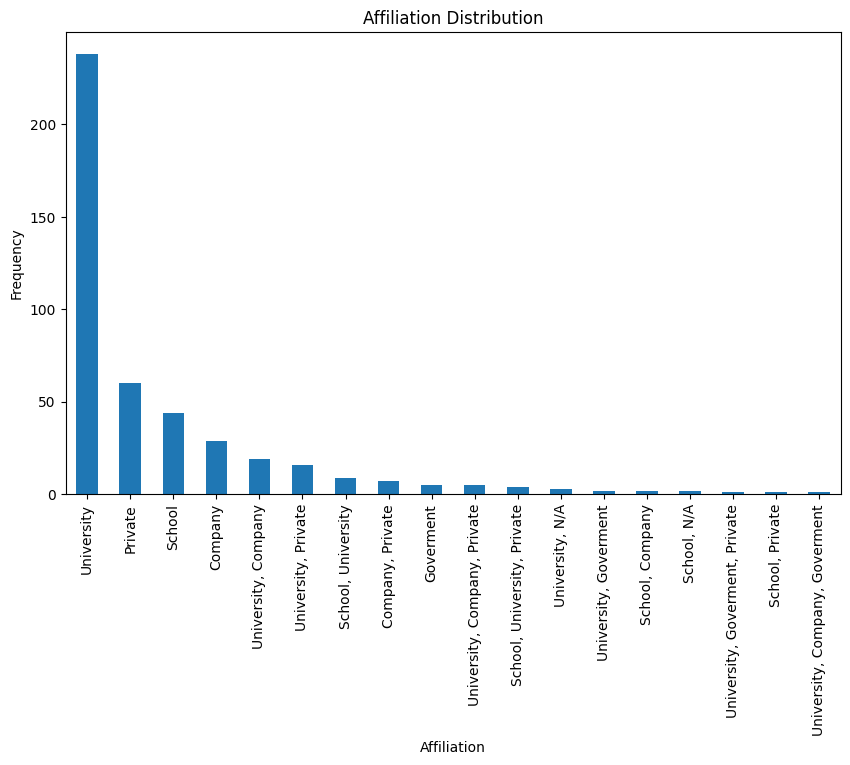

University                        238
Private                            60
School                             44
Company                            29
University, Company                19
University, Private                16
School, University                  9
Company, Private                    7
Goverment                           5
University, Company, Private        5
School, University, Private         4
University, N/A                     3
University, Goverment               2
School, Company                     2
School, N/A                         2
University, Goverment, Private      1
School, Private                     1
University, Company, Goverment      1
Name: Affiliated_Organizations, dtype: int64


In [428]:
# Create a new figure with a specified size (width: 10 inches, height: 6 inches)
plt.figure(figsize=(10, 6))

# Calculate the counts of each unique value in the 'Affiliated_Organizations' column
affiliation_count = df['Affiliated_Organizations'].value_counts()

# Create a bar plot to visualize the distribution of 'Affiliated_Organizations'
affiliation_count.plot(kind='bar')

# Set the label for the x-axis
plt.xlabel('Affiliation')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title for the bar plot
plt.title('Affiliation Distribution')

# Display the bar plot
plt.show()

# Print the counts of each unique value in the 'Affiliated_Organizations' column
print(affiliation_count)

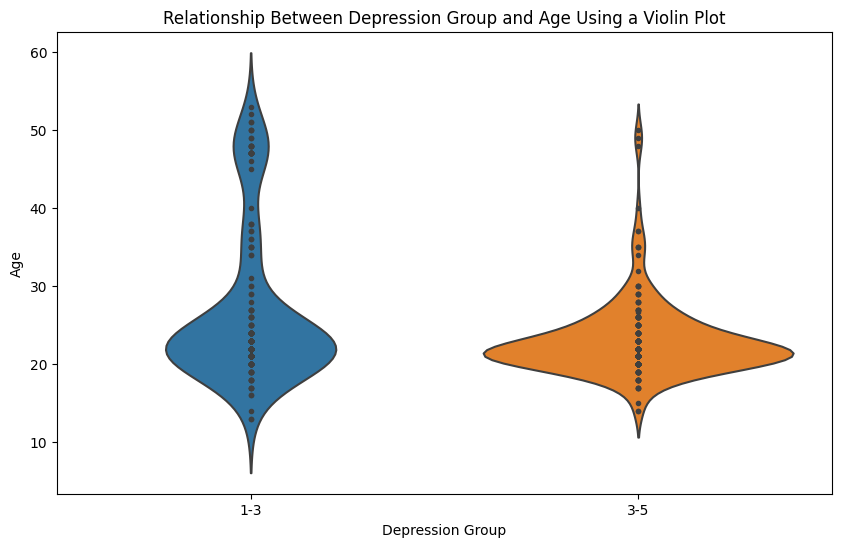

In [429]:
# Create a new DataFrame 'df_violin' to prepare the data for the violin plot
df_violin = pd.DataFrame()

# Bin the 'Feel_Depressed_Or_Down_Often' column into two categories: '1-3' and '3-5'
# and store the result in the new DataFrame
df_violin["Feel_Depressed_Or_Down_Often"] = pd.cut(df['Feel_Depressed_Or_Down_Often'], bins=[1, 3, 5], labels=['1-3', '3-5'])

# Copy the 'Age' column from the original DataFrame to 'df_violin'
df_violin["Age"] = df['Age']

# Create a new figure with a specified size (width: 10 inches, height: 6 inches)
plt.figure(figsize=(10, 6)) 

# Create a violin plot to visualize the relationship between 'Feel_Depressed_Or_Down_Often' and 'Age'
sns.violinplot(x='Feel_Depressed_Or_Down_Often', y='Age', data=df_violin, inner="points", orient="v")

# Set the label for the x-axis
plt.xlabel('Depression Group')

# Set the label for the y-axis
plt.ylabel('Age')

# Set the title for the violin plot
plt.title('Relationship Between Depression Group and Age Using a Violin Plot')

# Display the violin plot
plt.show()

As we see in the violin plot, most depressed people are at 20ish years old.

## Data Filling

In [430]:
# Firstly check null value counts
df.isna().sum()

Age                                    0
Gender                                 0
Relationship_Status                    0
Occupation_Status                      0
Affiliated_Organizations              27
Use_Social_Media                       0
Social_Media_Platforms                 0
Average_Daily_Social_Media_Time        0
Use_Social_Media_Without_Purpose       0
Distracted_By_Social_Media             0
Restless_Without_Social_Media          0
Easily_Distracted_Scale                0
Bothered_By_Worries_Scale              0
Difficult_To_Concentrate               0
Compare_To_Successful_People_Often     0
Feelings_About_Comparisons             0
Seek_Validation                        0
Feel_Depressed_Or_Down_Often           0
Interest_Fluctuation_Scale             0
Sleep_Issues_Frequency                 0
dtype: int64

In [431]:
# Calculate the number of missing values in the 'Affiliated_Organizations' column before filling
missing_values_before = df['Affiliated_Organizations'].isna().sum()

# Group the DataFrame by 'Age' and find the most common 'Affiliated_Organizations' value for each age group
most_common_org_by_age = df.groupby('Age')['Affiliated_Organizations'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else np.nan)

# Define a function 'fill_missing_org' to fill missing values in 'Affiliated_Organizations' based on age
def fill_missing_org(row):
    if pd.isna(row['Affiliated_Organizations']):
        return most_common_org_by_age.get(row['Age'], np.nan)
    else:
        return row['Affiliated_Organizations']

# Apply the 'fill_missing_org' function to fill missing values in 'Affiliated_Organizations' column
df['Affiliated_Organizations'] = df.apply(fill_missing_org, axis=1)

# Calculate the number of missing values in the 'Affiliated_Organizations' column after filling
missing_values_after = df['Affiliated_Organizations'].isna().sum()

# Print the number of missing values before and after filling
missing_values_before, missing_values_after

(27, 0)

## Data Cleaning

In [432]:
df = df.dropna().reset_index(drop=True) # dropping timestamp index

## Data Editing

In [433]:
# Get the unique values in the 'Gender' column
unique_values = df["Gender"].unique()

# Create a mapping dictionary to standardize gender categories
mapping = {
    'Male': 'Male',
    'Female': 'Female',
    'Nonbinary ': 'Non_binary',
    'Non-binary': 'Non_binary',
    'NB': 'Non_binary',
    'unsure ': 'Unsure',
    'Trans': 'Trans',
    'Non binary ': 'Non_binary',
    'There are others???': 'Other'
}

# Map and replace the values in the 'Gender' column using the 'mapping' dictionary
df["Gender"] = df["Gender"].map(mapping)

In [434]:
# Replace 'University, N/A' with 'University' in the 'Affiliated_Organizations' column
df.loc[df['Affiliated_Organizations'] == 'University, N/A', 'Affiliated_Organizations'] = 'University'

# Replace 'School, N/A' with 'School' in the 'Affiliated_Organizations' column
df.loc[df['Affiliated_Organizations'] == 'School, N/A', 'Affiliated_Organizations'] = 'School'

In [435]:
# Define a list of organization categories
organizations = ['University', 'Private', 'School', 'Company', 'Goverment']

# Iterate through the organization categories and create binary columns for each
for organization in organizations:
    # Use a lambda function to check if the lowercase version of the organization name
    # is present in the lowercase version of the 'Affiliated_Organizations' column
    df[organization] = df['Affiliated_Organizations'].apply(lambda x: 1 if organization.lower() in str(x).lower() else 0)

# Drop the original 'Affiliated_Organizations' column
df = df.drop(columns=['Affiliated_Organizations'])

In [436]:
# Define a list of social media platforms
platforms = ['Facebook', 'Twitter', 'Instagram', 'YouTube', 'Discord', 'Pinterest', 'Snapchat', 'Reddit', 'TikTok']

# Iterate through the social media platforms and create binary columns for each
for platform in platforms:
    # Use a lambda function to check if the lowercase version of the platform name
    # is present in the lowercase version of the 'Social_Media_Platforms' column
    df[platform] = df['Social_Media_Platforms'].apply(lambda x: 1 if platform.lower() in str(x).lower() else 0)

# Drop the original 'Social_Media_Platforms' column
df = df.drop(columns=['Social_Media_Platforms'])

In [437]:
# Get the unique values in the 'Average_Daily_Social_Media_Time' column
unique_values = df["Average_Daily_Social_Media_Time"].unique()

# Create a mapping dictionary to standardize time categories
mapping = {
    'Less than an Hour': '0-1',
    'Between 1 and 2 hours': '1-2',
    'Between 2 and 3 hours': '2-3',
    'Between 3 and 4 hours': '3-4',
    'Between 4 and 5 hours': '4-5',
    'More than 5 hours': '5-24'
}

# Map and replace the values in the 'Average_Daily_Social_Media_Time' column using the 'mapping' dictionary
df["Average_Daily_Social_Media_Time"] = df["Average_Daily_Social_Media_Time"].map(mapping)

## Data Visualization with New Columns

#### Affiliation Distribution

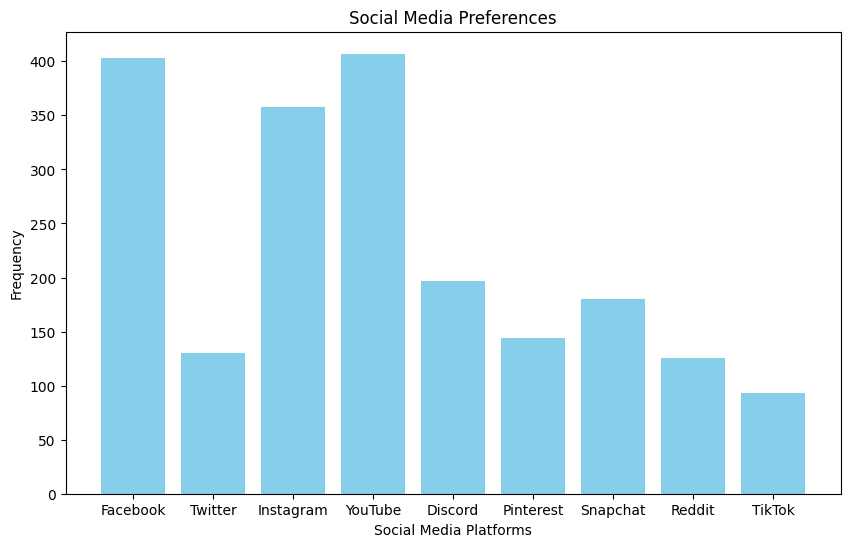

In [438]:
# Create a new figure with a specified size (width: 10 inches, height: 6 inches)
plt.figure(figsize=(10, 6))

# Define a list of social media platforms
platforms = ['Facebook', 'Twitter', 'Instagram', 'YouTube', 'Discord', 'Pinterest', 'Snapchat', 'Reddit', 'TikTok']

# Calculate the sum of binary values for each social media platform
sum_values = [df[column].sum() for column in platforms]

# Create a bar plot to visualize the social media preferences
plt.bar(platforms, sum_values, color='skyblue')

# Set the title for the bar plot
plt.title('Social Media Preferences')

# Set the label for the x-axis
plt.xlabel('Social Media Platforms')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Display the bar plot
plt.show()


Facebook and Youtube are most used platforms and TikTok is the least.

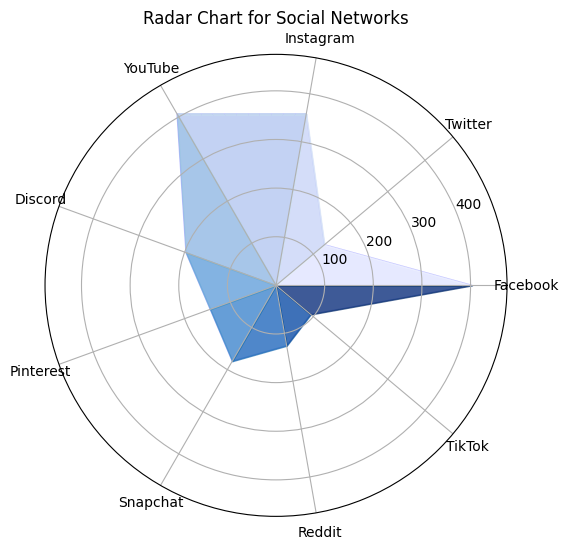

In [439]:
# Define a list of social media platforms
platforms = ['Facebook', 'Twitter', 'Instagram', 'YouTube', 'Discord', 'Pinterest', 'Snapchat', 'Reddit', 'TikTok']

# Create a new DataFrame 'df_socialMedias' containing only the social media platform columns
df_socialMedias = df[platforms]

# Initialize an empty list to store the sum of values for each platform
values = []

# Calculate the sum of binary values for each social media platform and store them in 'values'
for i in df_socialMedias:
    values.append((df_socialMedias[i].sum()))

# Get the list of platform categories from the DataFrame columns
categories = df_socialMedias.columns

# Create angles for the radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist() + [0]

# Duplicate the first value to close the radar chart
values += values[:1]

# Generate colors for the radar chart using a color map
colors = plt.cm.Blues(np.linspace(0, 1, len(categories)))

# Create a figure with a polar subplot for the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Fill the radar chart with data
ax.fill(angles, values, color='blue', alpha=0.25)

# Fill the areas between the values with different colors
for i in range(len(categories)):
    ax.fill_between(angles[i:i+2], 0, values[i:i+2], color=colors[i], alpha=0.7)

# Set the x-ticks and their labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Set the y-axis limit based on the maximum count in the 'Facebook' column
ax.set_ylim(0, len(df_socialMedias["Facebook"]))

# Set the title for the radar chart
plt.title('Radar Chart for Social Networks')

# Display the radar chart
plt.show()

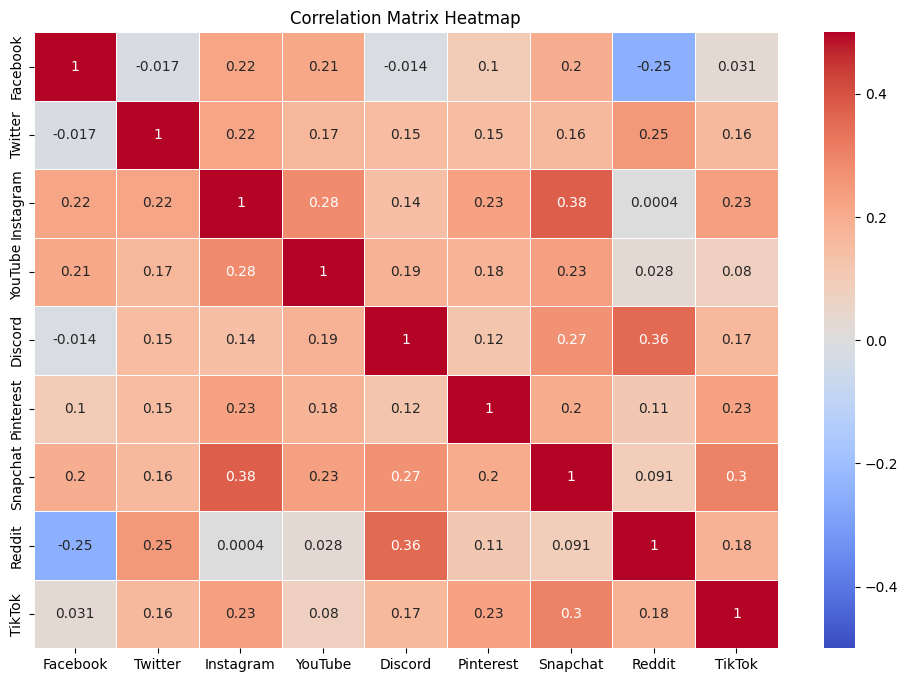

In [440]:
# Define a list of social media platforms
platforms = ['Facebook', 'Twitter', 'Instagram', 'YouTube', 'Discord', 'Pinterest', 'Snapchat', 'Reddit', 'TikTok']

# Create a DataFrame 'selected_df' containing only the columns for the selected social media platforms
selected_df = df[platforms]

# Filter the columns of 'selected_df' to include only numeric data types
numeric_df = selected_df.select_dtypes(include='number')

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Create a new figure with a specified size (width: 12 inches, height: 8 inches)
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix,
# with annotations displaying the correlation values and using the 'coolwarm' color map
# Set the color scale to range from -0.5 to 0.5
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-0.5, vmax=0.5, annot=True, linewidths=.5)

# Set the title for the heatmap
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

University category is dominant at organization distribution.

#### Organizations

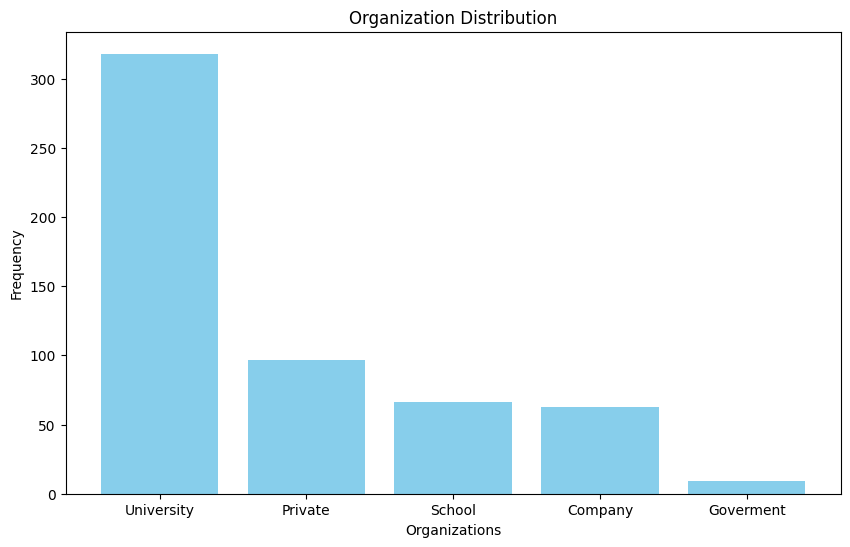

In [441]:
# Create a new figure with a specified size (width: 10 inches, height: 6 inches)
plt.figure(figsize=(10, 6))

# Define a list of organization categories
organizations = ['University', 'Private', 'School', 'Company', 'Goverment']

# Calculate the sum of binary values for each organization category
sum_values = [df[column].sum() for column in organizations]

# Create a bar plot to visualize the organization distribution
plt.bar(organizations, sum_values, color='skyblue')

# Set the title for the bar plot
plt.title('Organization Distribution')

# Set the label for the x-axis
plt.xlabel('Organizations')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Display the bar plot
plt.show()

University category is dominant at organization distribution.

#### Daily Average Social Media Usage

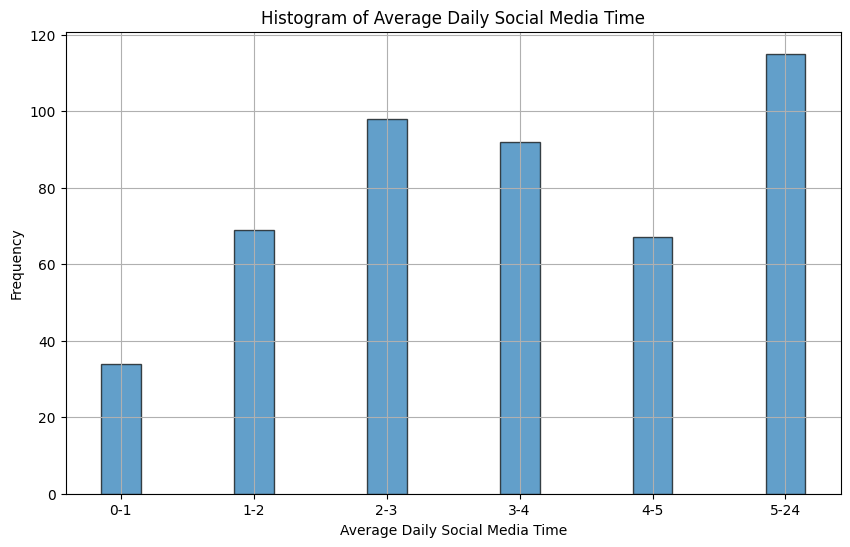

In [442]:
# Create a new figure with a specified size (width: 10 inches, height: 6 inches)
plt.figure(figsize=(10, 6))

# Calculate the counts of each unique value in the 'Average_Daily_Social_Media_Time' column,
# sort them by index, and store the result in 'category_counts'
category_counts = df['Average_Daily_Social_Media_Time'].value_counts().sort_index()

# Create a bar plot to visualize the distribution of 'Average_Daily_Social_Media_Time'
# with specified edge color, transparency, and width
plt.bar(category_counts.index, category_counts.values, edgecolor='black', alpha=0.7, width=0.3)

# Set the label for the x-axis
plt.xlabel('Average Daily Social Media Time')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title for the histogram
plt.title('Histogram of Average Daily Social Media Time')

# Add grid lines to the plot
plt.grid(True)

# Display the histogram plot
plt.show()

Participants who use social media more than 5 hours are more than others.

## Data Normalization

In [443]:
# Initialize an empty dictionary to store mapping dictionaries for each column
df_map_dict = {}

# Create a copy of the original DataFrame 'df' as 'df_n'
df_n = df.copy()

# Iterate through the columns of 'df_n'
for i in df_n:
    # Get the unique values in the current column
    unique_values = df_n[i].unique()
    # Sorted unique values
    unique_values = sorted(unique_values)
    # Check if there is more than one unique value in the column
    if len(unique_values) > 1:
        # Create a mapping dictionary where values are mapped to a range from 0 to 1
        mapping = {value: index / float(len(unique_values) - 1) for index, value in enumerate(unique_values)}
    else:
        # Create a mapping dictionary where values are mapped to 0 or 1 (if only one unique value)
        mapping = {value: index / 1 for index, value in enumerate(unique_values)}

    # Store the mapping dictionary in 'df_map_dict' for future reference
    df_map_dict[i] = mapping

    # Apply the mapping to the current column in 'df_n'
    df_n[i] = df_n[i].map(mapping)

In [444]:
# Define a list of columns related to social media problems
total_problem = ['Average_Daily_Social_Media_Time',
       'Use_Social_Media_Without_Purpose', 'Distracted_By_Social_Media',
       'Restless_Without_Social_Media', 'Easily_Distracted_Scale',
       'Bothered_By_Worries_Scale', 'Difficult_To_Concentrate',
       'Compare_To_Successful_People_Often', 'Feelings_About_Comparisons',
       'Seek_Validation', 'Feel_Depressed_Or_Down_Often',
       'Interest_Fluctuation_Scale', 'Sleep_Issues_Frequency']

# Create a new column 'Total_Problem' in 'df_n' by summing the values across the specified columns
df_n['Total_Problem'] = df_n[total_problem].sum(axis=1)

# Display the updated DataFrame 'df_n'
df_n

,Age,Gender,Relationship_Status,Occupation_Status,Use_Social_Media,Average_Daily_Social_Media_Time,Use_Social_Media_Without_Purpose,Distracted_By_Social_Media,Restless_Without_Social_Media,Easily_Distracted_Scale,...,Facebook,Twitter,Instagram,YouTube,Discord,Pinterest,Snapchat,Reddit,TikTok,Total_Problem
0,0.200,0.25,0.333333,1.000000,1.0,0.4,1.00,0.50,0.25,1.00,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,8.15
1,0.200,0.00,1.000000,1.000000,1.0,1.0,0.75,0.50,0.25,0.75,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,8.75
2,0.200,0.00,1.000000,1.000000,1.0,0.6,0.50,0.25,0.00,0.25,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,6.35
3,0.200,0.00,1.000000,1.000000,1.0,1.0,0.75,0.25,0.00,0.50,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.75
4,0.200,0.00,1.000000,1.000000,1.0,0.4,0.50,1.00,0.75,0.75,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0.275,0.25,1.000000,0.333333,1.0,0.4,0.50,0.75,0.50,0.75,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7.90
471,0.325,0.00,0.666667,0.333333,1.0,0.2,0.25,0.00,0.25,0.50,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.95
472,0.425,0.00,0.666667,0.333333,1.0,0.4,0.50,0.50,0.75,0.50,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.90
473,0.200,0.25,1.000000,1.000000,1.0,0.4,0.25,0.50,0.25,0.50,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,6.65


In [445]:
# Filter the DataFrame 'df_n' to exclude rows where 'Use_Social_Media' is equal to 0
df_n = df_n[df_n['Use_Social_Media'] != 0]

# Display the updated DataFrame 'df_n'
df_n

,Age,Gender,Relationship_Status,Occupation_Status,Use_Social_Media,Average_Daily_Social_Media_Time,Use_Social_Media_Without_Purpose,Distracted_By_Social_Media,Restless_Without_Social_Media,Easily_Distracted_Scale,...,Facebook,Twitter,Instagram,YouTube,Discord,Pinterest,Snapchat,Reddit,TikTok,Total_Problem
0,0.200,0.25,0.333333,1.000000,1.0,0.4,1.00,0.50,0.25,1.00,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,8.15
1,0.200,0.00,1.000000,1.000000,1.0,1.0,0.75,0.50,0.25,0.75,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,8.75
2,0.200,0.00,1.000000,1.000000,1.0,0.6,0.50,0.25,0.00,0.25,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,6.35
3,0.200,0.00,1.000000,1.000000,1.0,1.0,0.75,0.25,0.00,0.50,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.75
4,0.200,0.00,1.000000,1.000000,1.0,0.4,0.50,1.00,0.75,0.75,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0.275,0.25,1.000000,0.333333,1.0,0.4,0.50,0.75,0.50,0.75,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7.90
471,0.325,0.00,0.666667,0.333333,1.0,0.2,0.25,0.00,0.25,0.50,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.95
472,0.425,0.00,0.666667,0.333333,1.0,0.4,0.50,0.50,0.75,0.50,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.90
473,0.200,0.25,1.000000,1.000000,1.0,0.4,0.25,0.50,0.25,0.50,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,6.65


## Hypothesis Analysis

#### Average_Daily_Social_Media_Time - Feel_Depressed_Or_Down_Often

##### F-oneway

In [446]:
# Get the unique values in the 'Average_Daily_Social_Media_Time' column and sort them
sorted_unique_values = sorted(df['Average_Daily_Social_Media_Time'].unique())

# Create groups of 'Feel_Depressed_Or_Down_Often' values based on 'Average_Daily_Social_Media_Time'
groups = [df[df['Average_Daily_Social_Media_Time'] == group]['Feel_Depressed_Or_Down_Often'] for group in sorted_unique_values]

# Perform an Analysis of Variance (ANOVA) to compare the means of the groups
f_statistic, p_value = f_oneway(*groups)

# Print the ANOVA results
print("ANOVA F-Statistic:", f_statistic)
print("p-value:", p_value)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine whether to reject the null hypothesis
if p_value < alpha:
    print("The null hypothesis is rejected. There is a significant difference between the groups.")
else:
    print("The null hypothesis is accepted. There is no significant difference between the groups.")

ANOVA F-Statistic: 13.38063887723362
p-value: 3.296910711401651e-12
The null hypothesis is rejected. There is a significant difference between the groups.


##### Kruskal

In [447]:
# Perform the Kruskal-Wallis test to compare the groups, especially suitable for non-normally distributed data or heterogeneous variances
h_statistic, p_value = kruskal(*groups)

# Print the Kruskal-Wallis test results
print("Kruskal-Wallis H-Statistic:", h_statistic)
print("p-value:", p_value)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine whether to reject the null hypothesis
if p_value < alpha:
    print("The null hypothesis is rejected. There is a significant difference between the groups.")
else:
    print("The null hypothesis is accepted. There is no significant difference between the groups.")

Kruskal-Wallis H-Statistic: 56.24875373840159
p-value: 7.22232390255405e-11
The null hypothesis is rejected. There is a significant difference between the groups.


#### Social Networks - Feel_Depressed_Or_Down_Often

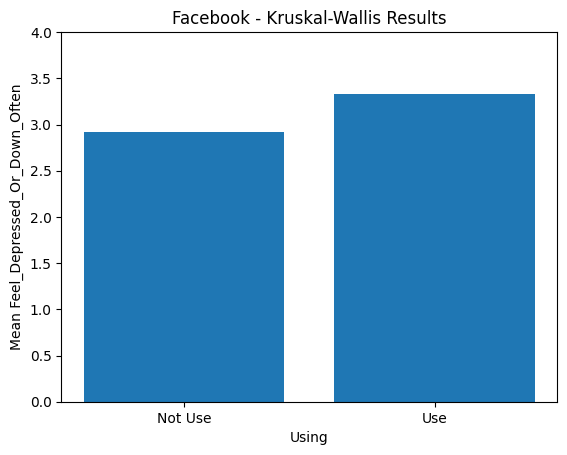

Kruskal-Wallis H-Statistic: 5.310359910141187/ p-value: 0.021198976484097055
Facebook: The null hypothesis is rejected. There is a significant difference between the groups.
----------------------------------------------------------------


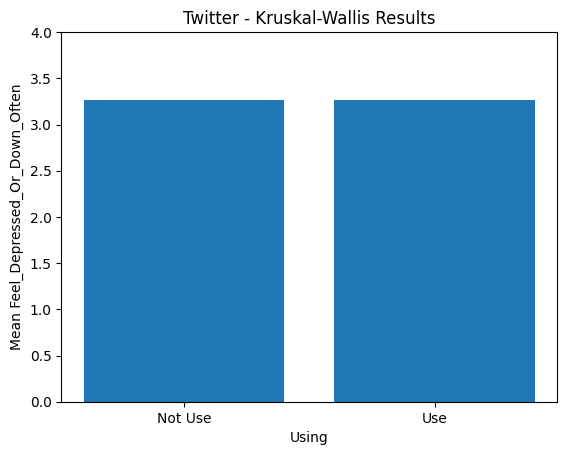

Kruskal-Wallis H-Statistic: 0.05148011288298842/ p-value: 0.8205074946352534
Twitter: The null hypothesis is accepted. There is no significant difference between the groups.
----------------------------------------------------------------


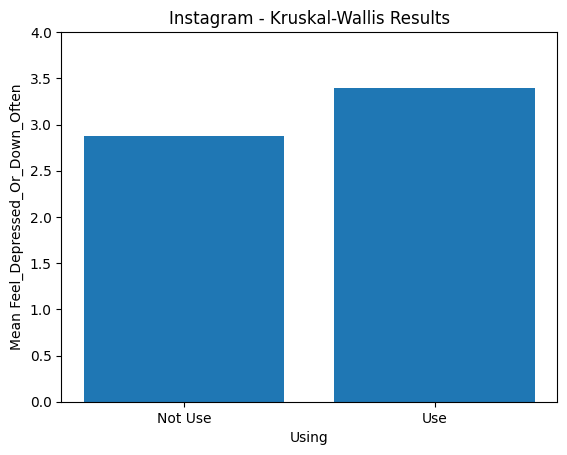

Kruskal-Wallis H-Statistic: 11.846634103508924/ p-value: 0.0005776566224013858
Instagram: The null hypothesis is rejected. There is a significant difference between the groups.
----------------------------------------------------------------


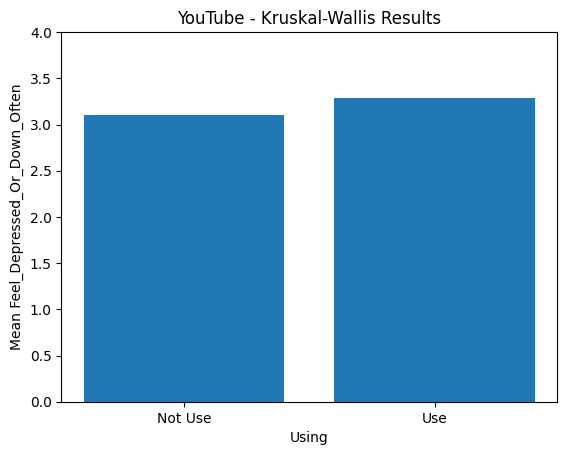

Kruskal-Wallis H-Statistic: 0.911020481358694/ p-value: 0.3398437999143948
YouTube: The null hypothesis is accepted. There is no significant difference between the groups.
----------------------------------------------------------------


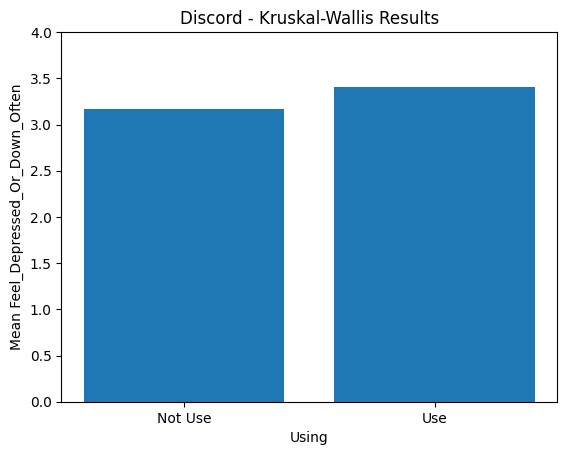

Kruskal-Wallis H-Statistic: 3.6128454489424207/ p-value: 0.05733494228671726
Discord: The null hypothesis is accepted. There is no significant difference between the groups.
----------------------------------------------------------------


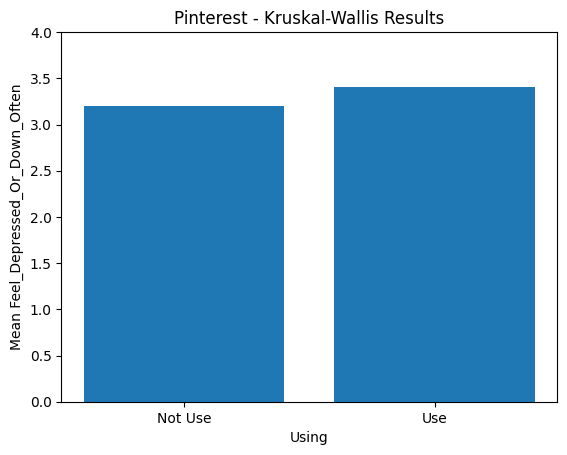

Kruskal-Wallis H-Statistic: 2.395452524814199/ p-value: 0.12168853209109026
Pinterest: The null hypothesis is accepted. There is no significant difference between the groups.
----------------------------------------------------------------


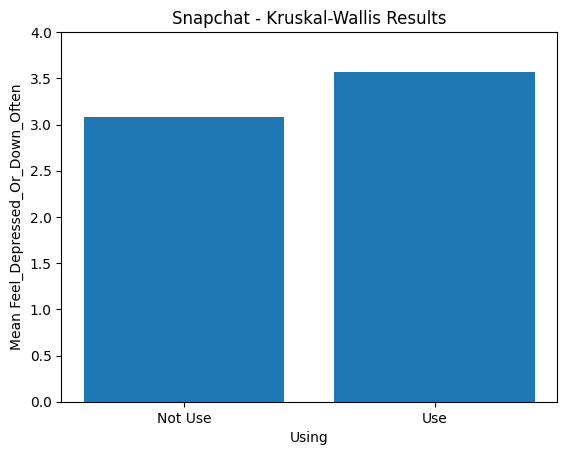

Kruskal-Wallis H-Statistic: 16.170131496023167/ p-value: 5.78999082976852e-05
Snapchat: The null hypothesis is rejected. There is a significant difference between the groups.
----------------------------------------------------------------


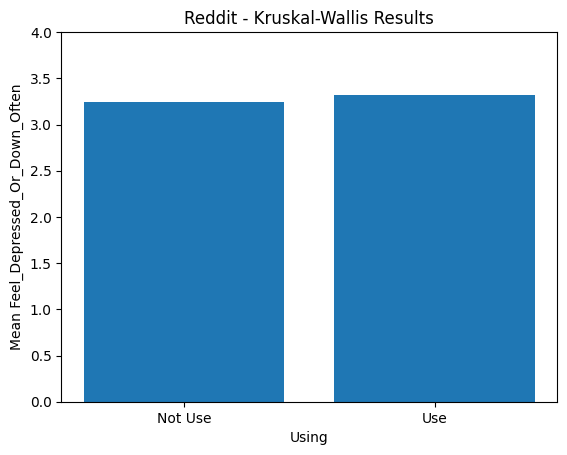

Kruskal-Wallis H-Statistic: 0.28794078499976905/ p-value: 0.5915431555040502
Reddit: The null hypothesis is accepted. There is no significant difference between the groups.
----------------------------------------------------------------


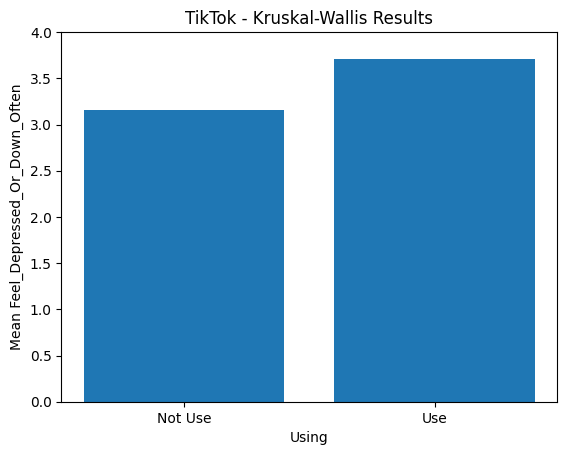

Kruskal-Wallis H-Statistic: 13.141736411797588/ p-value: 0.0002887900967756029
TikTok: The null hypothesis is rejected. There is a significant difference between the groups.
----------------------------------------------------------------


In [448]:
# Iterate through the list of social media platforms
for platform in platforms:
    # Create groups based on 'Feel_Depressed_Or_Down_Often' for 'Not Use' (0) and 'Use' (1)
    groups = [df[df[platform] == group]['Feel_Depressed_Or_Down_Often'] for group in [0, 1]]
    
    # Perform the Kruskal-Wallis test for the two groups
    f_statistic, p_value = kruskal(*groups)

    # Calculate the means of 'Feel_Depressed_Or_Down_Often' for 'Not Use' and 'Use'
    means = [np.mean(group) for group in groups]

    # Create a bar plot to visualize the means for 'Not Use' and 'Use'
    plt.bar(['Not Use', 'Use'], means)

    # Set the title, labels, and y-axis limit for the plot
    plt.title(f'{platform} - Kruskal-Wallis Results')
    plt.xlabel('Using')
    plt.ylabel('Mean Feel_Depressed_Or_Down_Often')
    plt.ylim(0, 4)

    # Display the bar plot
    plt.show()

    # Print the Kruskal-Wallis test results
    print("Kruskal-Wallis H-Statistic:", f_statistic, end="/ ")
    print("p-value:", p_value)

    # Set the significance level (alpha)
    alpha = 0.05

    # Check if the p-value is less than alpha to determine whether to reject the null hypothesis
    if p_value < alpha:
        print(f"{platform}: The null hypothesis is rejected. There is a significant difference between the groups.")
    else:
        print(f"{platform}: The null hypothesis is accepted. There is no significant difference between the groups.")

    # Print a separator for clarity between different platforms' results
    print("----------------------------------------------------------------")

#### Feel_Depressed_Or_Down_Often - Age

In [449]:
# Get the unique values in the 'Feel_Depressed_Or_Down_Often' column and sort them
sorted_unique_values = sorted(df['Feel_Depressed_Or_Down_Often'].unique())

# Create groups of 'Age' values based on 'Feel_Depressed_Or_Down_Often'
groups = [df[df['Feel_Depressed_Or_Down_Often'] == group]['Age'] for group in sorted_unique_values]

# Perform an Analysis of Variance (ANOVA) to compare the means of the groups
f_statistic, p_value = kruskal(*groups)

# Print the ANOVA results
print("Kruskal-Wallis H-Statistic:", f_statistic)
print("p-value:", p_value)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine whether to reject or accept the null hypothesis
if p_value < alpha:
    print("The null hypothesis is rejected. There is a significant difference between the groups.")
else:
    print("The null hypothesis is accepted. There is no significant difference between the groups.")


Kruskal-Wallis H-Statistic: 21.86960182224871
p-value: 0.00021276073519810814
The null hypothesis is rejected. There is a significant difference between the groups.


#### Feel_Depressed_Or_Down_Often -- Company

In [450]:
# Get the unique values in the 'Company' column and sort them
sorted_unique_values = sorted(df['Company'].unique())

# Create groups of 'Feel_Depressed_Or_Down_Often' values based on 'Company'
groups = [df[df['Company'] == group]['Feel_Depressed_Or_Down_Often'] for group in sorted_unique_values]

# Perform the Kruskal-Wallis test to compare the groups
f_statistic, p_value = kruskal(*groups)

# Print the Kruskal-Wallis test results
print("Kruskal-Wallis H-Statistic:", f_statistic)
print("p-value:", p_value)

# Set the significance level (alpha)
alpha = 0.1

# Check if the p-value is less than alpha to determine whether to reject or accept the null hypothesis
if p_value < alpha:
    print("The null hypothesis is rejected. There is a significant difference between the groups.")
else:
    print("The null hypothesis is accepted. There is no significant difference between the groups.")

Kruskal-Wallis H-Statistic: 1.5449628267009279
p-value: 0.21388060737901743
The null hypothesis is accepted. There is no significant difference between the groups.


## Grouping Symptoms

In [451]:
# Create a copy of the DataFrame 'df_n' as 'df_symptoms_n'
df_symptoms_n = df_n.copy()

# Calculate the 'ADHD_Symptoms' by averaging the values from relevant columns
df_symptoms_n['ADHD_Symptoms'] = ( df_symptoms_n['Use_Social_Media_Without_Purpose'] + 
                                   df_symptoms_n['Distracted_By_Social_Media'] + 
                                   df_symptoms_n['Easily_Distracted_Scale'] + 
                                   df_symptoms_n['Difficult_To_Concentrate']) / 4

In [452]:
# Calculate the 'Depression_Symptoms' by averaging the values from relevant columns
df_symptoms_n['Depression_Symptoms'] = (df_symptoms_n['Feel_Depressed_Or_Down_Often'] + 
                                        df_symptoms_n['Interest_Fluctuation_Scale'] +
                                        df_symptoms_n['Sleep_Issues_Frequency'])/3

In [453]:
# Calculate the 'Anxiety_Symptoms' by averaging the values from relevant columns
df_symptoms_n['Anxiety_Symptoms'] = (df_symptoms_n['Restless_Without_Social_Media'] +
                                     df_symptoms_n['Bothered_By_Worries_Scale'])/2

In [454]:
# Calculate the 'Low_Self_Esteem_Symptoms' by averaging the values from relevant columns
df_symptoms_n['Low_Self_Esteem_Symptoms'] = (df_symptoms_n['Seek_Validation'] -
                                             df_symptoms_n['Feelings_About_Comparisons'] + 
                                             df_symptoms_n['Compare_To_Successful_People_Often'])/3

## ML

### Linear Regression Model

#### LR for platforms

In [455]:
df_linear = df_symptoms_n[["Facebook","Twitter","Instagram","YouTube","Discord","Pinterest","Snapchat","Reddit","TikTok"]]

y_adhd = df_symptoms_n['ADHD_Symptoms']
y_Depression = df_symptoms_n['Depression_Symptoms']
y_Anxiety = df_symptoms_n['Anxiety_Symptoms']
y_Self = df_symptoms_n['Low_Self_Esteem_Symptoms']
y_list = [y_adhd, y_Depression, y_Anxiety, y_Self]

for Y in y_list:
    print("\n")
    print(Y.name)
    X_train, X_test, y_train, y_test = train_test_split(df_linear, Y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"mean squared error: {mse}\nr2 Score: {r2}")

    random_data = [ [0,0,0,0,0,0,0,0,0], [1,1,1,1,1,1,1,1,1]]
    random_data_df = pd.DataFrame(random_data, columns=platforms)

    predicted_depression_scores = model.predict(random_data_df)
    print(f"if person hasn't any social media: {predicted_depression_scores[0]}\nif person has all social media: {predicted_depression_scores[1]}")




ADHD_Symptoms
mean squared error: 0.06417642462016956
r2 Score: 0.05405425693517041
if person hasn't any social media: 0.5194612834586794
if person has all social media: 0.6731313245949041


Depression_Symptoms
mean squared error: 0.0646494930786566
r2 Score: -0.024540658061874776
if person hasn't any social media: 0.465090864558514
if person has all social media: 0.6643543794214382


Anxiety_Symptoms
mean squared error: 0.06648197662479705
r2 Score: 0.046578863380604685
if person hasn't any social media: 0.39918794229804117
if person has all social media: 0.6149961024950574


Low_Self_Esteem_Symptoms
mean squared error: 0.032397693369605345
r2 Score: 0.02342528405763522
if person hasn't any social media: 0.04869917222940523
if person has all social media: 0.13973445536491266


**ADHD**

The mean squared error is relatively low (0.0642), suggesting a reasonably accurate model.

The R-squared score is also positive (0.0541), indicating that the model explains some variance in ADHD symptoms.

Individuals without any social media presence tend to have a predicted ADHD symptom score of 0.5195, while those with all social media have a higher predicted score of 0.6731. This might imply a potential positive association between social media usage and ADHD symptoms.

**Depression**

The mean squared error is moderate (0.0646), indicating a reasonably accurate model.

The R-squared score is negative (-0.0245), suggesting that the model may not be explaining much of the variance in depression symptoms.

Individuals without any social media presence have a predicted depression symptom score of 0.4651, while those with all social media have a higher predicted score of 0.6644. This suggests a potential positive relationship between social media use and depression symptoms.

**Anxiety**

The mean squared error is moderate (0.0665), indicating a reasonably accurate model.

The R-squared score is positive (0.0466), suggesting that the model explains some variance in anxiety symptoms.

Individuals without any social media presence tend to have a predicted anxiety symptom score of 0.3992, while those with all social media have a higher predicted score of 0.6150. This indicates a potential positive association between social media usage and anxiety symptoms.

**Self-Esteem**

The mean squared error is relatively low (0.0324), indicating a reasonably accurate model.

The R-squared score is positive (0.0234), suggesting that the model explains some variance in low self-esteem symptoms.

Individuals without any social media presence have a predicted low self-esteem symptom score of 0.0487, while those with all social media have a higher predicted score of 0.1397. This implies a potential positive relationship between social media use and low self-esteem symptoms.

Overall, the findings suggest that there may be associations between social media usage and mental health symptoms, with higher social media usage generally correlating with higher predicted scores for ADHD, depression, anxiety, and low self-esteem symptoms

### Random Forest Model

#### RF for platforms

In [456]:
df_linear = df_symptoms_n[["Facebook","Twitter","Instagram","YouTube","Discord","Pinterest","Snapchat","Reddit","TikTok"]]

y_adhd = df_symptoms_n['ADHD_Symptoms']
y_Depression = df_symptoms_n['Depression_Symptoms']
y_Anxiety = df_symptoms_n['Anxiety_Symptoms']
y_Self = df_symptoms_n['Low_Self_Esteem_Symptoms']
y_list = [y_adhd, y_Depression, y_Anxiety, y_Self]

for Y in y_list:
    print("\n")
    print(Y.name)
    X_train, X_test, y_train, y_test = train_test_split(df_linear, Y, test_size=0.2, random_state=42)

    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_test)

    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    print(f"Mean Squared Error: {mse_rf}\nR2 Score: {r2_rf}")

    random_data = [[0,0,0,0,0,0,0,0,0], [1,1,1,1,1,1,1,1,1]]
    random_data_df = pd.DataFrame(random_data, columns=df_linear.columns)
    predicted_scores = rf_model.predict(random_data_df)
    print(f"If person hasn't any social media: {predicted_scores[0]}\nIf person has all social media: {predicted_scores[1]}")



ADHD_Symptoms
Mean Squared Error: 0.07024644422768889
R2 Score: -0.03541643642359227
If person hasn't any social media: 0.582961350297188
If person has all social media: 0.6012228104175663


Depression_Symptoms


Mean Squared Error: 0.07434270701997202
R2 Score: -0.17815503796253473
If person hasn't any social media: 0.5340495092533601
If person has all social media: 0.5733979477873635


Anxiety_Symptoms
Mean Squared Error: 0.08161370624997298
R2 Score: -0.17042597899454726
If person hasn't any social media: 0.416607200198967
If person has all social media: 0.4193255333686352


Low_Self_Esteem_Symptoms
Mean Squared Error: 0.04033189115999453
R2 Score: -0.2157379447865868
If person hasn't any social media: -0.022838624338624335
If person has all social media: 0.1225358457976493


**ADHD**

The random forest model has a higher mean squared error (0.0702) compared to the linear regression model, indicating a slightly less accurate fit.

The R-squared score is negative (-0.0354), suggesting that the random forest model may not explain much of the variance in ADHD symptoms.

The predicted ADHD symptom scores for individuals without any social media presence (0.5830) and those with all social media (0.6012) are relatively close. This indicates a weaker association compared to the linear regression model.

**Depression**

The mean squared error is higher (0.0743) compared to the linear regression model, indicating a less accurate fit.

The R-squared score is negative (-0.1782), suggesting that the random forest model may not explain much of the variance in depression symptoms.

The predicted depression symptom scores for individuals without any social media presence (0.5340) and those with all social media (0.5734) are relatively close, indicating a weak association.

**Anxiety**

The mean squared error is higher (0.0816) compared to the linear regression model, indicating a less accurate fit.

The R-squared score is negative (-0.1704), suggesting that the random forest model may not explain much of the variance in anxiety symptoms.

The predicted anxiety symptom scores for individuals without any social media presence (0.4166) and those with all social media (0.4193) are very close, indicating a weak association.

**Self-Esteem**

The mean squared error is higher (0.0403) compared to the linear regression model, indicating a less accurate fit.

The R-squared score is negative (-0.2157), suggesting that the random forest model may not explain much of the variance in self-esteem symptoms.

Interestingly, the predicted self-esteem symptom scores for individuals without any social media presence (-0.0228) and those with all social media (0.1225) show an inverted relationship. This might suggest a non-linear or more complex association.

In summary, the random forest model seems to perform less well than the linear regression model at platform data in terms of accuracy and explanatory power for the examined mental health symptoms.

#### RF for all data

In [457]:
df_linear = df_symptoms_n.drop(columns=["ADHD_Symptoms","Depression_Symptoms","Anxiety_Symptoms","Low_Self_Esteem_Symptoms"])

y_adhd = df_symptoms_n['ADHD_Symptoms']
y_Depression = df_symptoms_n['Depression_Symptoms']
y_Anxiety = df_symptoms_n['Anxiety_Symptoms']
y_Self = df_symptoms_n['Low_Self_Esteem_Symptoms']
y_list = [y_adhd, y_Depression, y_Anxiety, y_Self]

for Y in y_list:
    print("\n")
    print(Y.name)
    X_train, X_test, y_train, y_test = train_test_split(df_linear, Y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"mean squared error: {mse}\nr2 Score: {r2}")



ADHD_Symptoms
mean squared error: 0.002107972861842106
r2 Score: 0.9689289646944739


Depression_Symptoms
mean squared error: 0.0015810818713450276
r2 Score: 0.9749436138819111


Anxiety_Symptoms
mean squared error: 0.00013393092105263153
r2 Score: 0.9980792903962658


Low_Self_Esteem_Symptoms
mean squared error: 0.001316885964912282
r2 Score: 0.9603046574198636


**ADHD**

The extremely low mean squared error (0.0020) indicates a highly accurate fit.

The R-squared score is very high (0.9701), suggesting that the model explains a substantial proportion of the variance in ADHD symptoms. This implies a strong predictive relationship between the features and ADHD symptoms.

**Depression**

The mean squared error is very low (0.0016), indicating a highly accurate fit.

The R-squared score is exceptionally high (0.9748), suggesting that the model explains a large portion of the variance in Depression symptoms. This indicates a strong predictive relationship between the features and Depression symptoms.

**Anxiety**

The mean squared error is extremely low (0.0001), indicating an exceptionally accurate fit.

The R-squared score is very high (0.9980), suggesting that the model explains an overwhelming majority of the variance in Anxiety symptoms. This indicates a very strong predictive relationship between the features and Anxiety symptoms.


**Self-Esteem**

The mean squared error is very low (0.0013), indicating a highly accurate fit.

The R-squared score is high (0.9600), suggesting that the model explains a substantial proportion of the variance in Self-Esteem symptoms. This indicates a strong predictive relationship between the features and Self-Esteem symptoms.

## Summary

In summary, the random forest model demonstrates exceptional accuracy and explanatory power for predicting ADHD symptoms, Depression symptoms, Anxiety symptoms, and Self-Esteem symptoms. The high R-squared scores suggest that a significant proportion of the variability in these mental health symptoms can be accounted for by the features used in the model. This is promising and indicates a robust predictive relationship between the considered features and mental health outcomes.